# WEATHER DATA ANALYSIS



# PROBLEM STATEMENT

Use a dataset containing historical weather data, including temperature, precipitation,
and wind speed.
Analyze seasonal weather patterns and trends over time.
Identify correlations between weather variables (e.g., temperature and precipitation).
Visualize weather data using line graphs, heatmaps, or box plots.
Extract insights about climate trends or extreme weather events from the analysis.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [3]:
df = pd.read_csv(r"C:\Users\admin\Downloads\weatherHistory.csv\weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [9]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

# Checking Null Values

In [11]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Exploratory Data Analysis

In [12]:
df.duplicated().sum()

24

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.drop('Loud Cover', axis=1, inplace=True)

In [16]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [18]:
df_num=df.select_dtypes(exclude=object)
df_cat=df.select_dtypes(include=object)             

# Data Visualisation

C:\Users\admin\AppData\Local\Temp\ipykernel_16356\4046588824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i], palette='rainbow')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\4046588824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i], palette='rainbow')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\4046588824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i], palette='rainbow')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\4046588824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is d

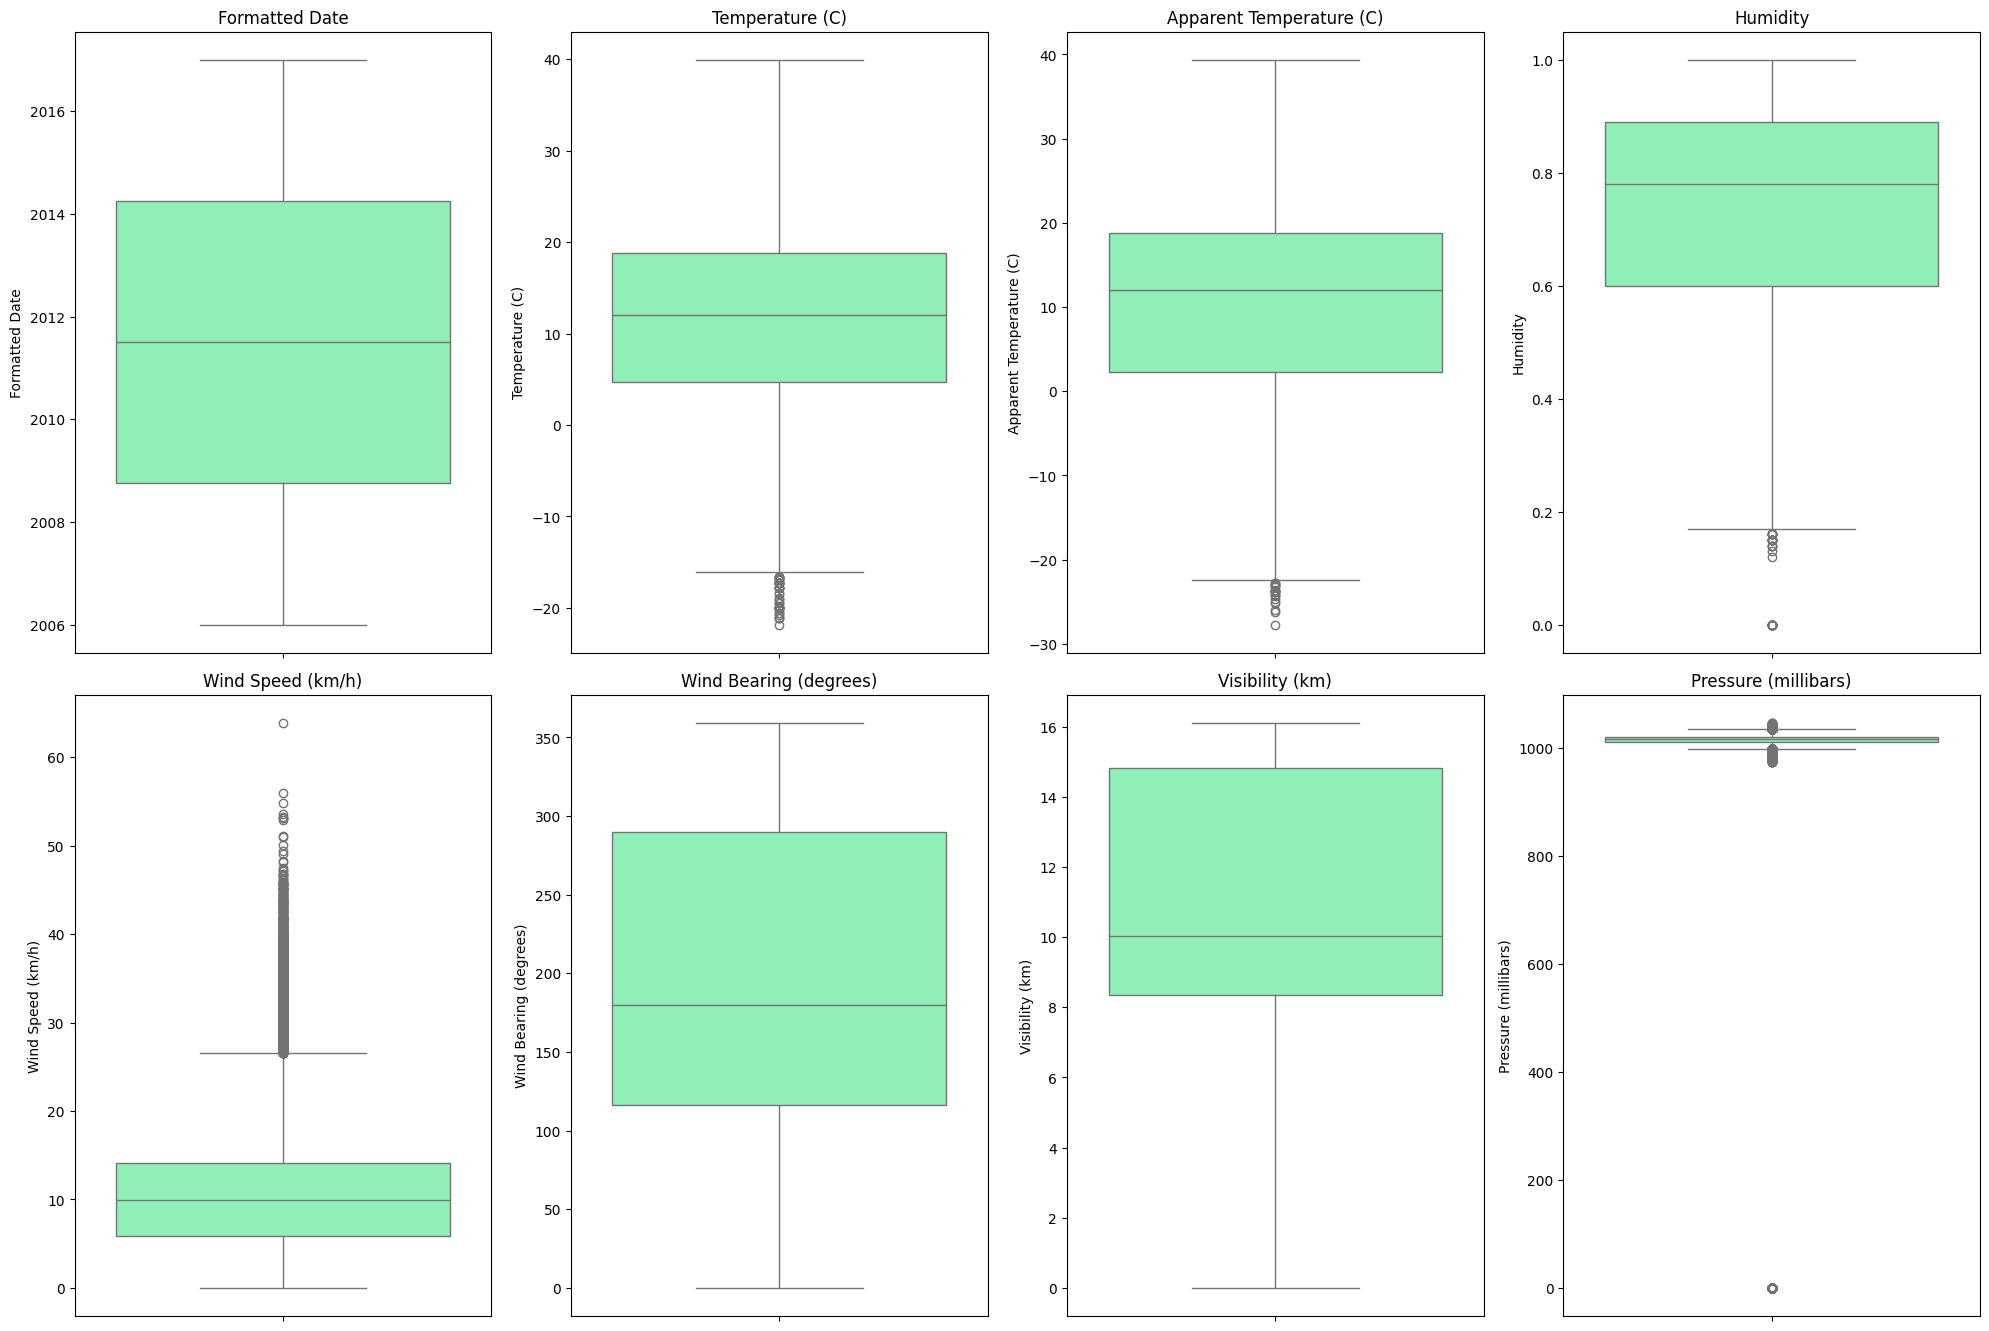

In [21]:
plt.figure(figsize=(20,20))

re=1
for i in df_num.columns:
    plt.subplot(3,4,re)
    sns.boxplot(df[i], palette='rainbow')
    plt.title(i)
    re+=1
plt.tight_layout()

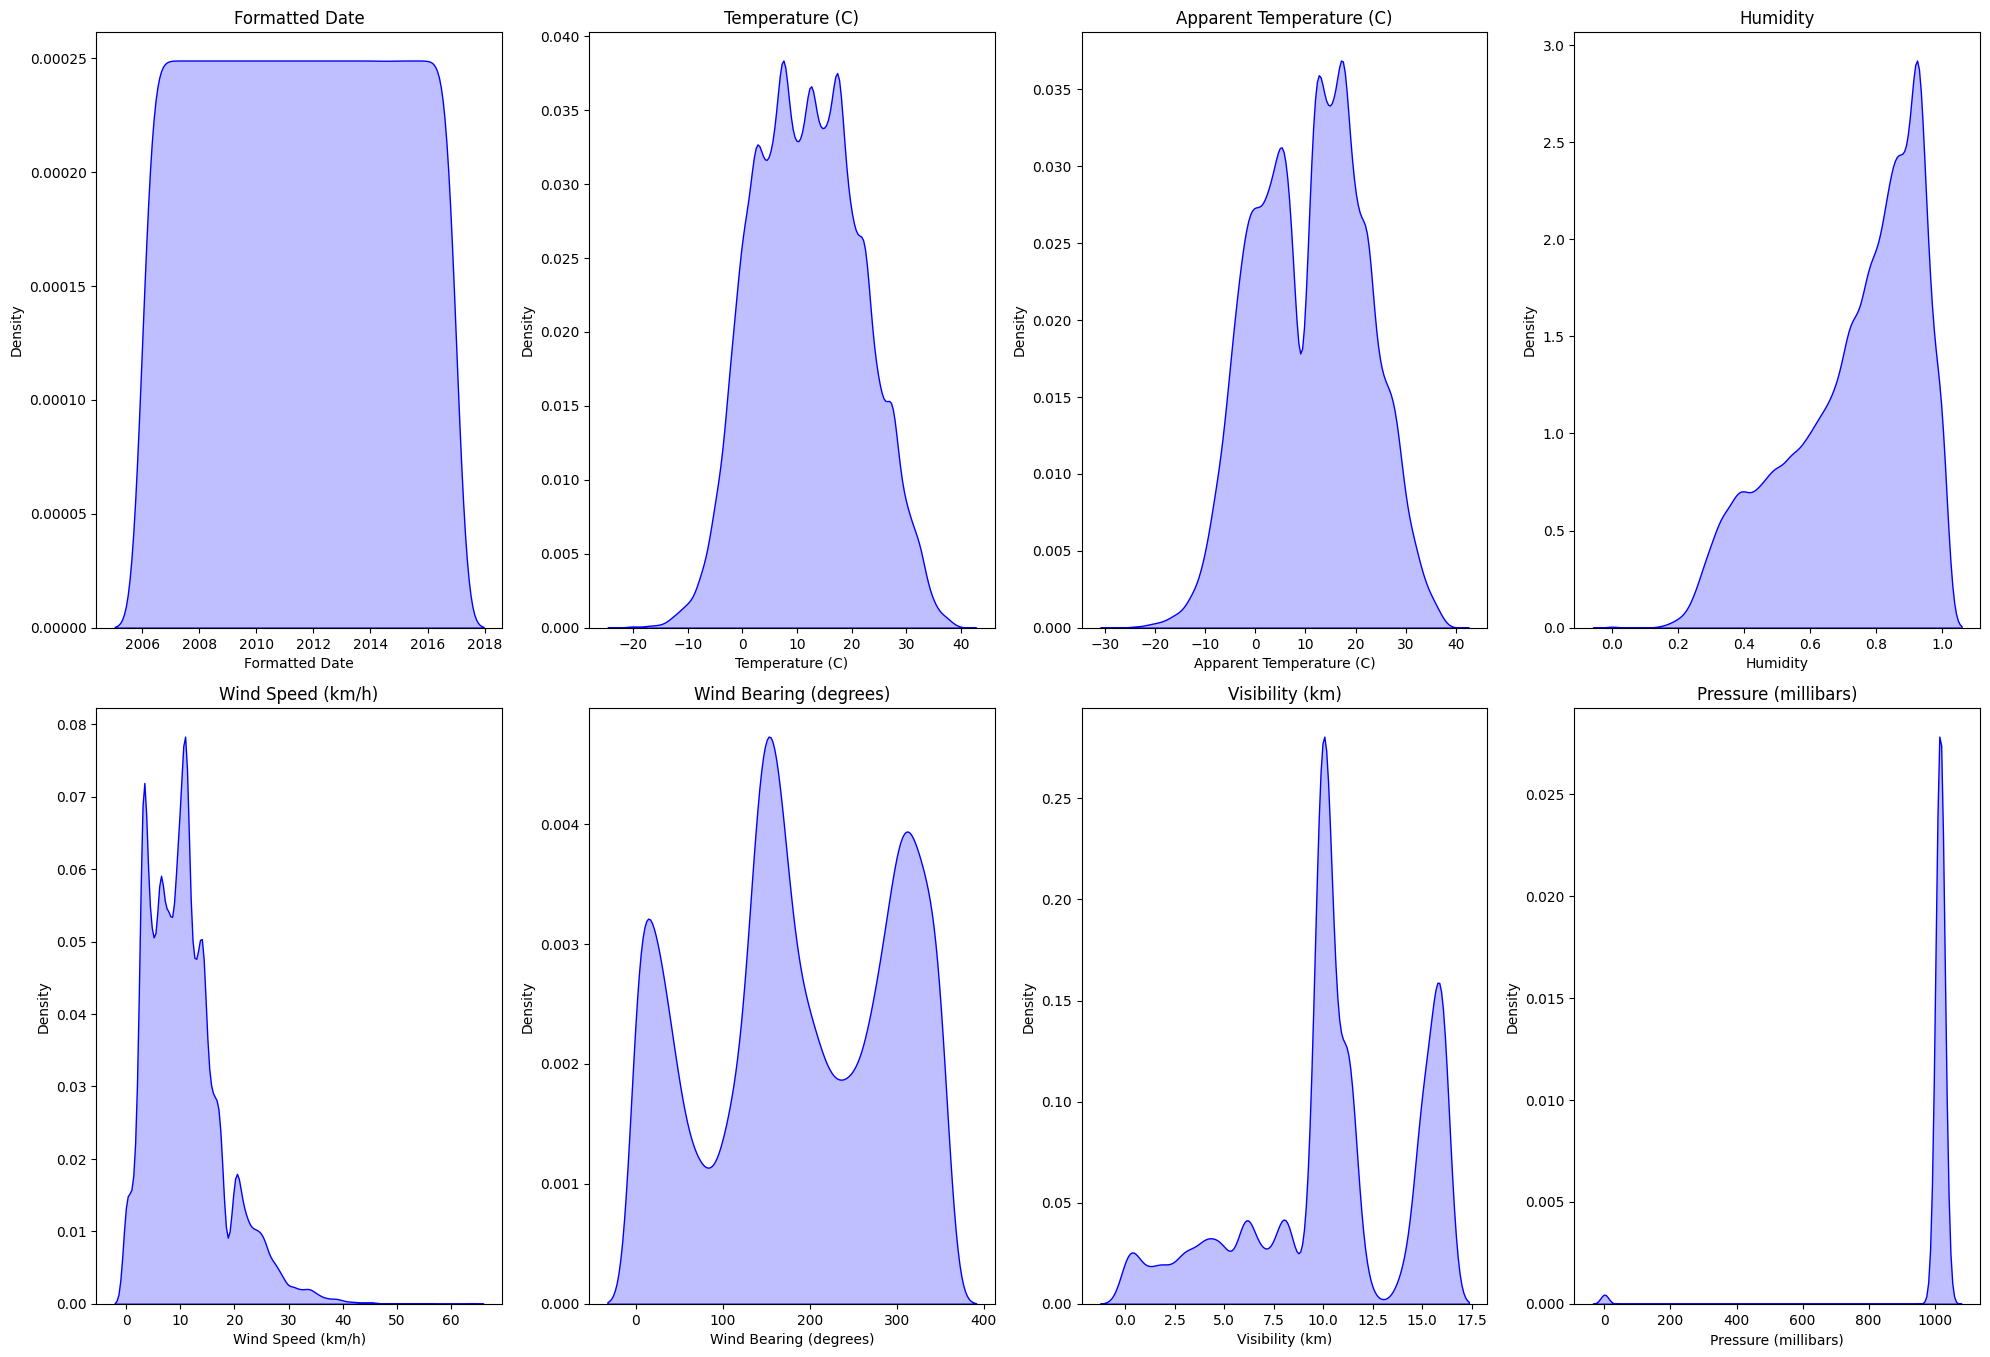

In [22]:
plt.figure(figsize=(20,20))

re=1
for i in df_num.columns:
    plt.subplot(3,4,re)
    sns.kdeplot(df[i], fill=True,color='blue')
    plt.title(i)
    re+=1
plt.tight_layout()

In [23]:
df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [24]:
df['Formatted Date'].nunique()

96429

In [25]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

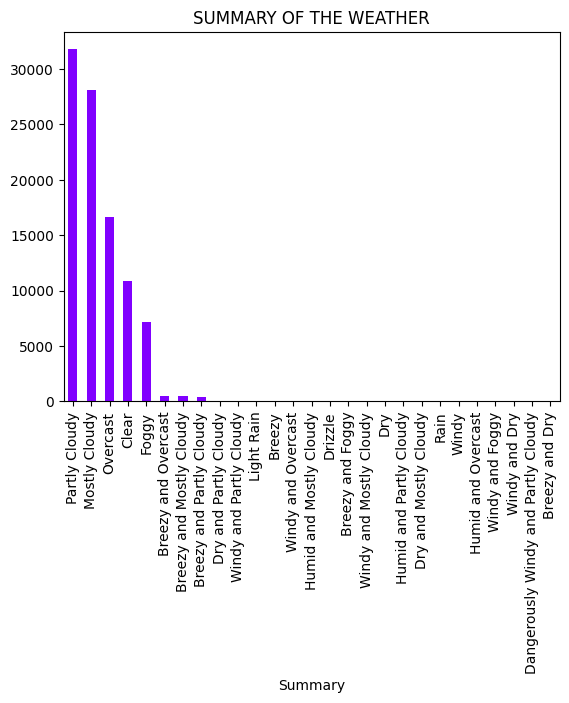

In [26]:
df['Summary'].value_counts().plot(kind='bar', cmap='rainbow')
plt.title('SUMMARY OF THE WEATHER')
plt.show()

In [27]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

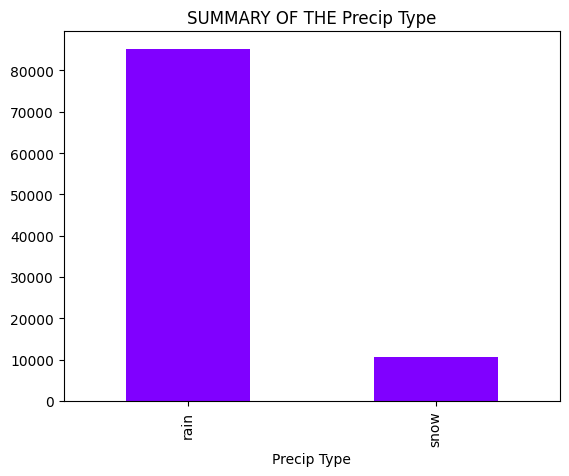

In [28]:
df['Precip Type'].value_counts().plot(kind='bar', cmap='rainbow')
plt.title('SUMMARY OF THE Precip Type')
plt.show()

In [29]:
df['Daily Summary'].value_counts()  

Daily Summary
Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.      

In [30]:
df.drop('Daily Summary', axis=1, inplace=True)

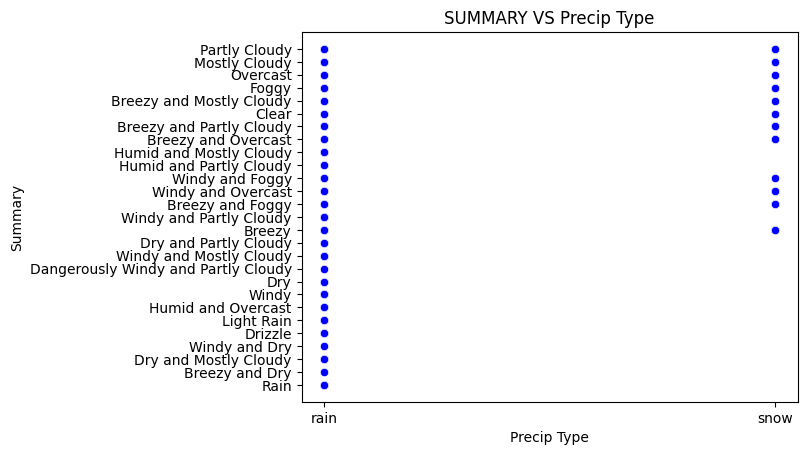

In [31]:
sns.scatterplot(y=df['Summary'], x=df['Precip Type'], color='blue')
plt.title('SUMMARY VS Precip Type')
plt.show()

In [32]:
df_new_num=df.drop(['Formatted Date','Summary','Precip Type' ], axis=1)

In [33]:
df_new_num

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


C:\Users\admin\AppData\Local\Temp\ipykernel_16356\1198666462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Precip Type'], y=df_new_num[i],palette='Blues')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\1198666462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Precip Type'], y=df_new_num[i],palette='Blues')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\1198666462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Precip Type'], y=df_new_num[i],palette='Blues')
C:\Users\admin\AppData\Local\Temp\ipykernel_16

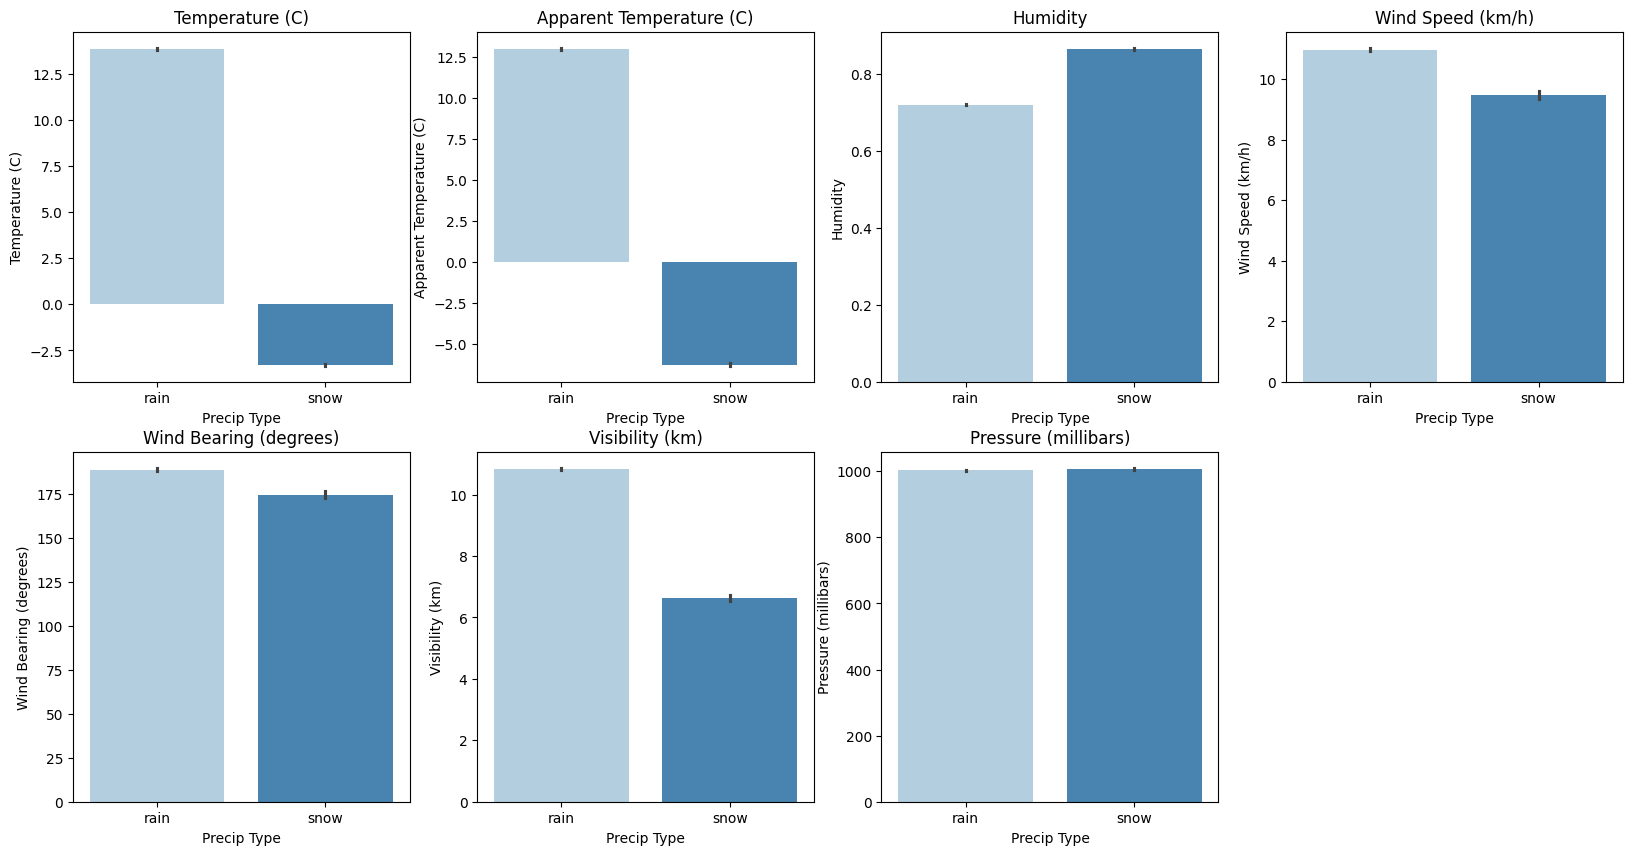

In [34]:
plt.figure(figsize=(20,10))
re=1
for i in df_new_num.columns:
    plt.subplot(2,4,re)
    sns.barplot(x=df['Precip Type'], y=df_new_num[i],palette='Blues')
    re+=1
    plt.title(i)
    
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16356\2240708308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['Summary'], x=df_new_num[i],palette='GnBu')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\2240708308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['Summary'], x=df_new_num[i],palette='GnBu')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\2240708308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['Summary'], x=df_new_num[i],palette='GnBu')
C:\Users\admin\AppData\Local\Temp\ipykernel_16356\2240708308.

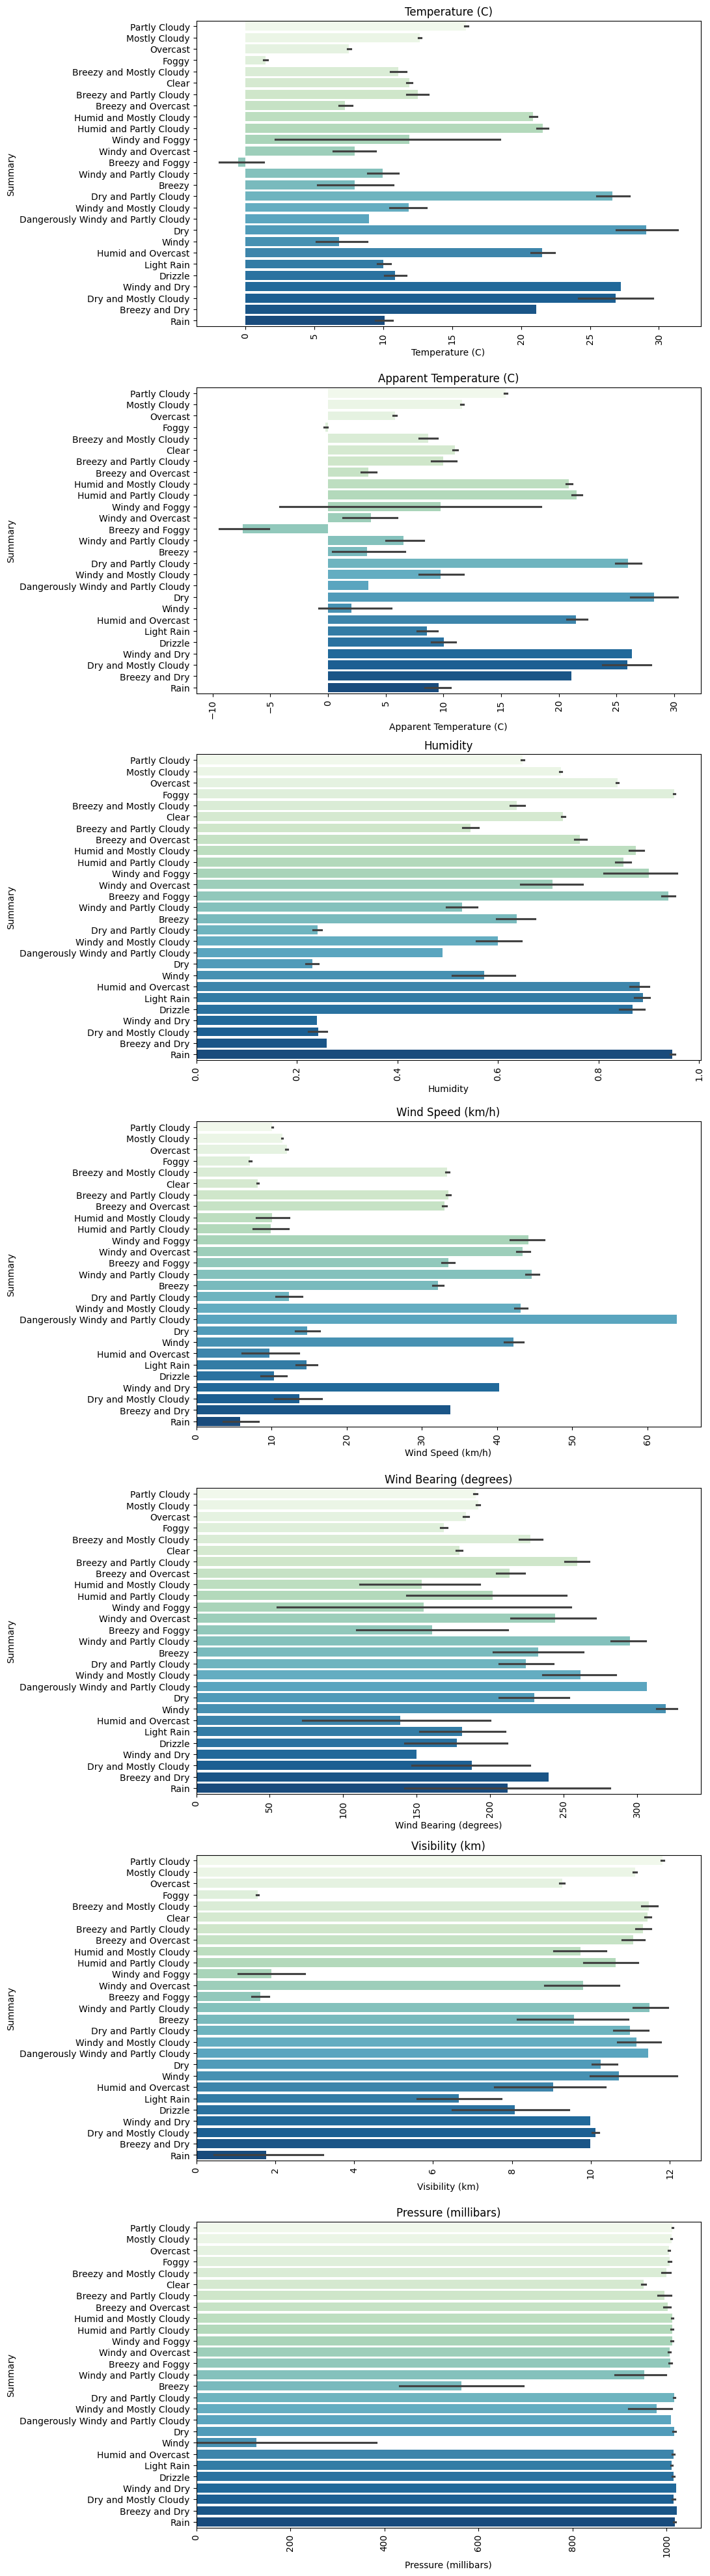

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(10,50))
re=1
for i in df_new_num.columns:
    plt.subplot(7,1,re)
    sns.barplot(y=df['Summary'], x=df_new_num[i],palette='GnBu')
    re+=1
    plt.title(i)
    plt.xticks(rotation=90)
    
plt.show()
plt.tight_layout()

# CONCLUSION

1. Year, and day has no effect on precipitation and weather summary while both mainly depends on the month, which is season.
2. As timezone changes there will be a change in temperature which may change overall daily weather condition.
3. Temperature on the dry day is the highest while temperature on the foggy abd breezy day is the lowest.
4. Pressure will be low on windy and breezy days.